# Bicycle rental locations in Bilbao

**Notes:** This geospatial data visualization project was re-worked by [Raynaldi Pratama](https://www.linkedin.com/in/raynaldiprtm/) as part of his learning journey in data science. The codes written below were forked from its original source: [Automating GIS-processes 2020](https://autogis-site.readthedocs.io/en/latest/) open access course provided by **Henrikki Tenkanen** & **Vuokko Heikinheimo**, Department of Geosciences and Geography, University of Helsinki.

## Street network

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt

# Specify the name that is used to search for the data
place_name = "Abando, Bilbao, Spain"

# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

type(graph)

networkx.classes.multidigraph.MultiDiGraph

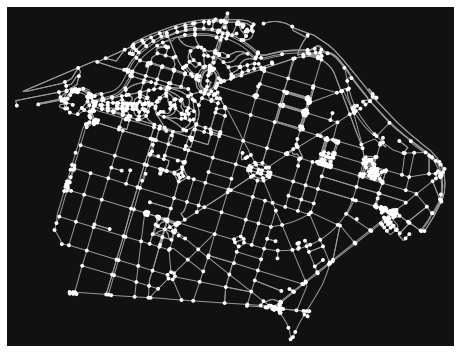

In [5]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

## Graph to GeoDataFrame

In [6]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [7]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
32325655,43.269137,-2.937044,3,NaN,NaN,POINT (-2.93704 43.26914)
102565389,43.263157,-2.935664,3,NaN,NaN,POINT (-2.93566 43.26316)
186149360,43.265827,-2.944938,4,NaN,NaN,POINT (-2.94494 43.26583)
243084764,43.262931,-2.924457,3,NaN,NaN,POINT (-2.92446 43.26293)
245937173,43.257884,-2.945766,4,NaN,NaN,POINT (-2.94577 43.25788)


In [8]:
edges.head()

osmid bridge  \
u         v          key                                  
32325655  1848294179 0                 133860965    yes   
                     1    [174088349, 174088342]    yes   
          1848294171 0                 174088344    yes   
102565389 1582390832 0                 812798732    NaN   
          245939347  0                 359617709    NaN   

                                                                       name  \
u         v          key                                                      
32325655  1848294179 0                                   Pedro Arrupe zubia   
                     1                                                  NaN   
          1848294171 0                                                  NaN   
102565389 1582390832 0       Plaza de Federico Moyúa / Federico Moyua plaza   
          245939347  0    Gran Vía Don Diego López de Haro / On Diego Lo...   

                             highway  oneway  length  \
u         v          key                               
32325655  1848294179 0    pedestrian   False  67.835   
                     1       footway   False  71.383   
          1848294171 0       footway   False  32.606   
102565389 1582390832 0       primary    True  10.099   
          245939347  0       primary   False  61.819   

                                                                   geometry  \
u         v          key                                                      
32325655  1848294179 0    LINESTRING (-2.93704 43.26914, -2.93687 43.26973)   
                     1    LINESTRING (-2.93704 43.26914, -2.93682 43.269...   
          1848294171 0    LINESTRING (-2.93704 43.26914, -2.93711 43.26943)   
102565389 1582390832 0    LINESTRING (-2.93566 43.26316, -2.93568 43.26307)   
          245939347  0    LINESTRING (-2.93566 43.26316, -2.93604 43.263...   

                         lanes maxspeed access junction tunnel service  
u         v          key                                                
32325655  1848294179 0     NaN      NaN    NaN      NaN    NaN     NaN  
                     1     NaN      NaN    NaN      NaN    NaN     NaN  
          1848294171 0     NaN      NaN    NaN      NaN    NaN     NaN  
102565389 1582390832 0       3       50    NaN      NaN    NaN     NaN  
          245939347  0       4       50    NaN      NaN    NaN     NaN

## Place polygon

In [9]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)

In [10]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

In [11]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-2.95083 43.26604, -2.95035 43.26529...",43.269902,43.255674,-2.923688,-2.950833,259677158,relation,8671676,43.263284,-2.938783,"Abando, Bilbao, Biscay, Autonomous Community o...",boundary,administrative,0.654032


<AxesSubplot:>

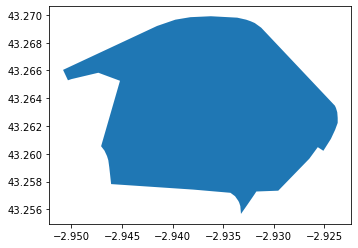

In [12]:
# Plot the area
area.plot()

## Building footprints

In [13]:
# List key-value pairs for tags
tags = {"building": True}

buildings = ox.geometries_from_place(place_name, tags)

In [43]:
len(buildings)

580

In [15]:
buildings.head()

,unique_id,osmid,element_type,building,name,name:es,note,office,phone,geometry,...,information,changing_table,drinking_water,toilets:disposal,toilets:position,unisex,stars,wikimedia_commons,ways,type
0,node/568273839,568273839,node,yes,Eusko Jaularitzako ordezkaritza,Gobierno Vasco,l-m-x-j 9a13 y 15a16:30 v 9a14h,government,+34 944031000,POINT (-2.94398 43.26479),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/2809991335,2809991335,node,church,Iglesia Padres Escolapios,NaN,NaN,NaN,NaN,POINT (-2.93376 43.26551),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/3954126240,3954126240,node,church,Parroquia de Nuestra Señora de San Fernando y ...,NaN,NaN,NaN,NaN,POINT (-2.93727 43.26275),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way/28211432,28211432,way,yes,Museo de Bellas Artes de Bilbao,Museo de Bellas Artes de Bilbao,NaN,NaN,+34 944396060,"POLYGON ((-2.93818 43.26607, -2.93750 43.26592...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way/28757165,28757165,way,yes,Kafe Antzokia,NaN,NaN,NaN,NaN,"POLYGON ((-2.92801 43.26385, -2.92786 43.26384...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
buildings.columns

Index(['unique_id', 'osmid', 'element_type', 'building', 'name', 'name:es',
       'note', 'office', 'phone', 'geometry', 'shop', 'wheelchair',
       'addr:city', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'website', 'amenity', 'name:en', 'opening_hours', 'denomination',
       'religion', 'atm:network', 'atm:operator', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'network', 'official_name', 'operator',
       'addr:district', 'addr:suburb', 'railway', 'access', 'fee', 'parking',
       'nodes', 'addr:state', 'fax', 'name:de', 'name:eu', 'tourism',
       'wikidata', 'wikipedia', 'historic', 'public_transport', 'station',
       'train', 'start_date', 'building:levels', 'description:en', 'smoking',
       'toilets', 'alt_name', 'platforms', 'old_name', 'roof:levels', 'atm',
       'golf', 'natural', 'architect', 'height', 'layer', 'location',
       'name:et', 'name:he', 'name:lb', 'name:pl', 'name:ru', 'name:uk',
       'building:min_level', 'building:levels:u

## Points-of-interest

In [17]:
# List key-value pairs for tags
tags = {"amenity": "bicycle_rental"}

# Retrieve charging stations
bicycle_rental = ox.geometries_from_place(place_name, tags)

In [44]:
# How many charging stations do we have?
len(bicycle_rental)

12

In [19]:
# Available columns
bicycle_rental.columns.values

array(['unique_id', 'osmid', 'element_type', 'amenity', 'capacity',
       'email', 'name', 'network', 'operator', 'phone', 'ref', 'website',
       'geometry'], dtype=object)

In [20]:
# Select some useful cols and print
cols = ["name", "ref", "geometry"]

In [21]:
bicycle_rental[cols]

,name,ref,geometry
0,10-EGUILLOR,3369,POINT (-2.93387 43.26119)
1,13-LEIZAOLA,3372,POINT (-2.93966 43.26730)
2,11-ANSELMO CLAVE,3370,POINT (-2.94462 43.26559)
3,12-INDAUTXU,3371,POINT (-2.93950 43.26073)
4,23-EGAÑA,3382,POINT (-2.93567 43.25793)
5,22-HEROS,3381,POINT (-2.93264 43.26462)
6,Tourne,NaN,POINT (-2.92509 43.26122)
7,07-AREILTZA,3366,POINT (-2.94357 43.25848)
8,26-ABANDO,3385,POINT (-2.92696 43.26074)
9,NaN,NaN,POINT (-2.92515 43.26137)


## Plotting the data

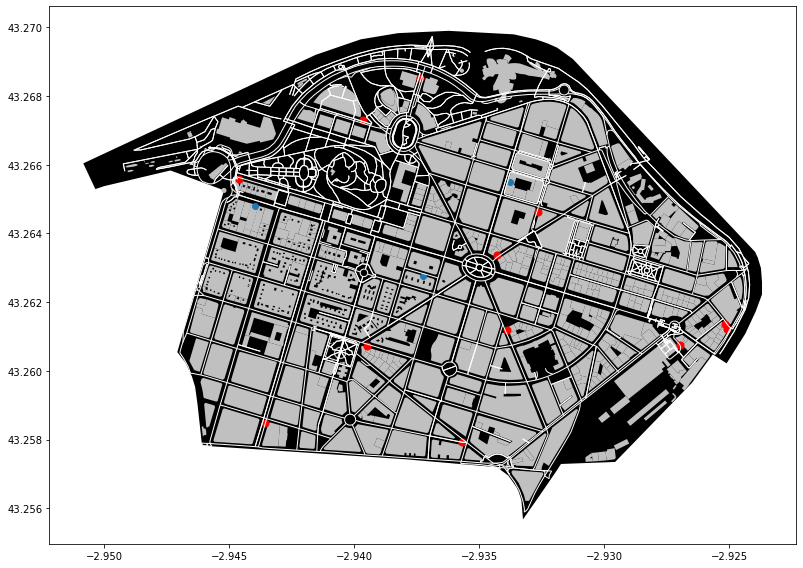

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor="white")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=1)

# Plot bicycle_rental
bicycle_rental.plot(ax=ax, color="red", alpha=1, markersize=50)

plt.tight_layout()